**Bibliothèques des Librairies**

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import svm


**Importations de la Dataset**

In [27]:
adult = pd.read_csv("Data/adult.csv", sep=",")
pd.set_option('.max_columns', 40)
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Echantillon et informations**

In [28]:
# taille de l'echantillon et les informations
adult.shape , adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


((48842, 15), None)

**Decoupage de la data selon le type des variables**

In [29]:
def varcat(data):
    return list(data.select_dtypes(include="object").columns)

def varnum(data):
    return list(data.select_dtypes(include=["int"]).columns)

In [30]:
varcat(adult)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

**Analyses exploratoires**

In [31]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
adult.duplicated().sum()

52

**Suppression des doublons**

In [33]:
df = adult.drop_duplicates()
df.shape

(48790, 15)

**Quelsues analyses descriptives sur les variables** Fethi

**Selection des variables puis transformation des variables catégorielles en numériques**

In [34]:
# Transformer les deux variables dichotomiques en numériques 
df['gender']= df['gender'].map({'Male': 0, 'Female': 1})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

#Transformer les autres variables categorielles en numeriques 
df = pd.get_dummies(df, columns=['workclass','marital-status','occupation', 'race','relationship'])
pd.set_option('.max_columns', 100)

#Supprimer les variables inutiles
df = df.drop(['occupation_?','education', 'native-country','workclass_?'], axis=1)

/var/folders/q8/n1xznm2s4k92f_f_2r5cxygc0000gn/T/ipykernel_13390/3869318153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']= df['gender'].map({'Male': 0, 'Female': 1})
/var/folders/q8/n1xznm2s4k92f_f_2r5cxygc0000gn/T/ipykernel_13390/3869318153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


**Définition de la matrice X et le vecteur y**

In [35]:
X = df.drop(['income'], axis =1)
y = df['income']

X.shape, y.shape

((48790, 47), (48790,))

**Echantillon d'etrainement et de test du modele**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36592, 47), (12198, 47), (36592,), (12198,))

**Standardisation des données avec des données comparables**

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Pour chaque modele on essaie de mesurer le score, la précision et l'erreur standard à minimiser**

**Premier modele de Classification -- Regression Logistique>> Variable expliquée est dichotomique**

In [38]:
# Score et la précision du modele
reglog = LogisticRegression(solver='lbfgs', max_iter=500)
reglog.fit(X_train, y_train)
print(f"Score d'Entrainement:  {reglog.score(X_train,y_train)}, Score de Test:  {reglog.score(X_test,y_test)}")

print(classification_report(reglog.predict(X_test), y_test))

Score d'Entrainement:  0.8522627896808046, Score de Test:  0.85284472864404
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      9788
           1       0.61      0.73      0.66      2410

    accuracy                           0.85     12198
   macro avg       0.77      0.81      0.78     12198
weighted avg       0.87      0.85      0.86     12198



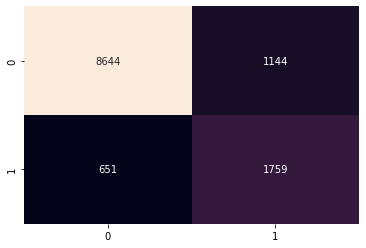

In [39]:
# Matrice de confusion du modele de regression

sns.heatmap(confusion_matrix(reglog.predict(X_test), y_test), annot=True, fmt='d', cbar=False);

In [40]:
# Erreur standard du modele
mean_squared_error(reglog.predict(X_test), y_test)

0.14715527135596

**2eme Modele de classification -- SVM**

In [47]:
# Score et la précision du modele
svc = svm.SVC(C= 10, degree= 1, gamma ='scale', kernel = 'poly')
svc.fit(X_train, y_train)
print(f"Score d'Entrainement:  {svc.score(X_train,y_train)}, Score de Test:  {svc.score(X_test,y_test)}");

print(classification_report(svc.predict(X_test), y_test))

Score d'Entrainement:  0.852180804547442, Score de Test:  0.8537465158222659
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      9827
           1       0.60      0.74      0.66      2371

    accuracy                           0.85     12198
   macro avg       0.77      0.81      0.78     12198
weighted avg       0.87      0.85      0.86     12198



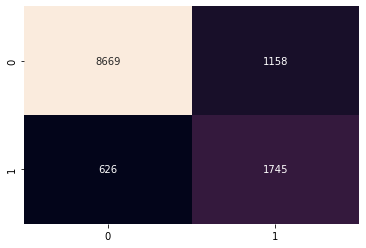

In [48]:
# Matrice de confusion du modele de regression

sns.heatmap(confusion_matrix(svc.predict(X_test), y_test), annot=True, fmt='d', cbar=False);

In [42]:
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 
              'C': [0.1, 1, 10], 
              'gamma':['auto', 'scale'], 
              'degree': [1, 2, 3]
         }
clf = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=3,n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [44]:
# Erreur standard du modele
mean_squared_error(svc.predict(X_test), y_test)

0.14682734874569603